# 비비빅 학습동아리 4회차_스터디
 - 2024.5.8.(수) 18:30~20:00
 - 데이터셋 만들기(계속)
 - 분류모델 만들기

## 라이브러리 임포트
 - pandas, numpy , sklearn, matplotlib, seaborn

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

### 데이터셋 만들기
- 아이리스 데이터로 데이터셋 만들어보기

In [27]:
# 데이터셋 만들기
a = load_iris()
X, y, x_nm, y_nm = a.data, a.target, a.feature_names , a.target_names
# 피처 데이터를 데이터프레임으로 변환
df = pd.DataFrame(data=X, columns=x_nm)     
df['target'] = y                            # 타겟 데이터를 데이터프레임에 추가
# df['species'] = df['target'].map({i: name for i, name in enumerate(y_nm)})   ## 종명을 추가하기
# 데이터프레임 출력
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


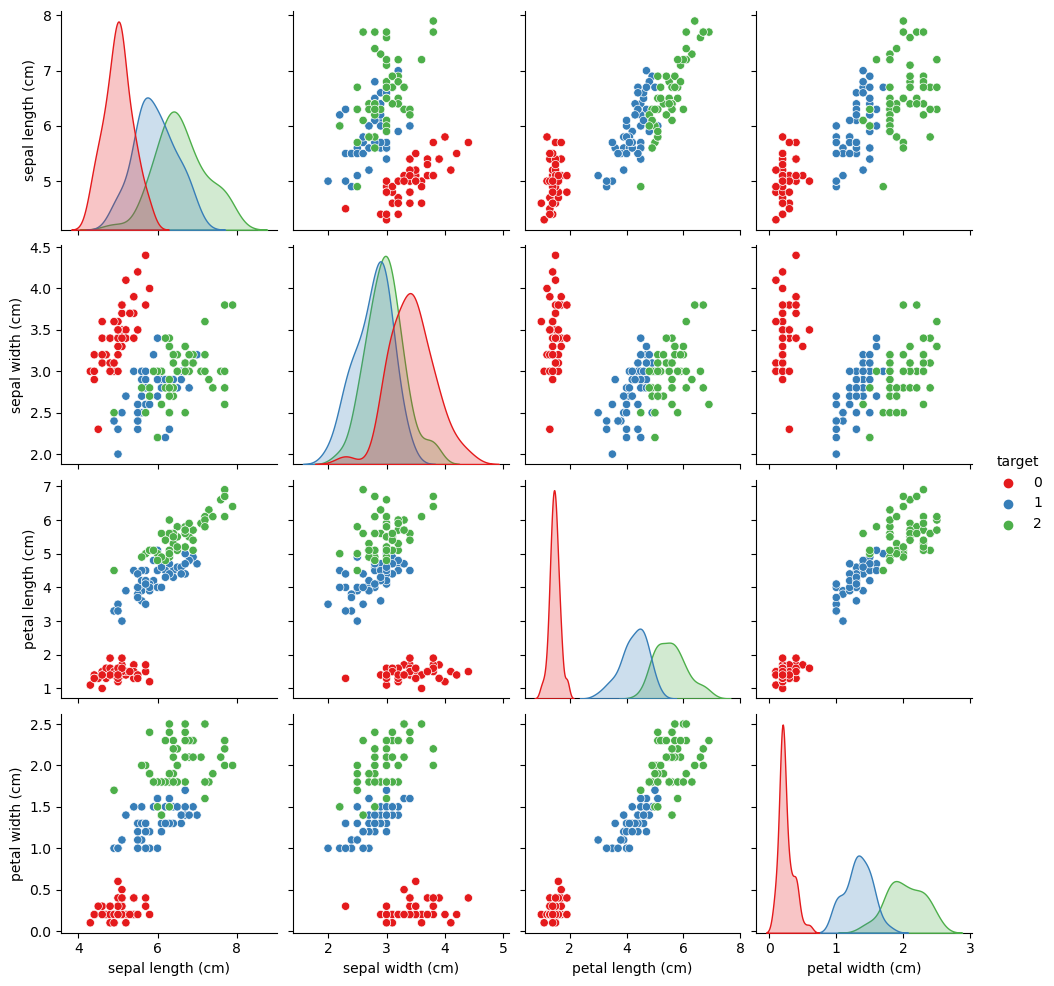

In [22]:
# pairplot
df_data   = df.iloc[:,0:5]   # feature 4, target 1, total 5 columns
df_target = df.columns[4]    # target
sns.pairplot(df_data, hue=df_target, palette='Set1')  # 같은 컬럼이 만나는 대각선에는 스캐터플롯 대신 히스토그램이 그려져 있다.

## 데이터 분할하기

In [61]:
# 분할하기 #대상변수의 종류가 4개인 이유?
X = df.iloc[:, :4]  # iloc[행rows,열colulmns] #iloc는 pd.DataFrame 분할을 위한 코드
y = df['target']

#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X
                                                   ,y
                                                   ,test_size=0.3
                                                   ,stratify=y
                                                   ,random_state=42)
# 랜덤 인덱스를 초기화
X_train = X_train.reset_index(drop=True) 
X_test  = X_test .reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test .reset_index(drop=True)

In [62]:
# 데이터 탐색
list = [X_train, X_test, y_train, y_test]

for a in list:
    print(a.head(5))
    print(a.info())
    print(a.describe())
    print('='*100)
# test_size 0.3 기준 105, 45분할됨

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               2.5                3.0               1.1
1                6.2               2.2                4.5               1.5
2                5.1               3.8                1.5               0.3
3                6.8               3.2                5.9               2.3
4                5.7               2.8                4.1               1.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  105 non-null    float64
 1   sepal width (cm)   105 non-null    float64
 2   petal length (cm)  105 non-null    float64
 3   petal width (cm)   105 non-null    float64
dtypes: float64(4)
memory usage: 3.4 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         105.000000        105.000000

### RandomForestClassifier 하이퍼 파라메터

| 하이퍼파라미터      | 기본값          | 설명                                               |
|------------------|--------------|--------------------------------------------------|
| `n_estimators`   | 100          | 앙상블에 사용될 트리의 수                           |
| `criterion`      | 'gini'       | 노드 분할 기준 ('gini' 또는 'entropy')            |
| `max_depth`      | None         | 트리의 최대 깊이 (제한 없음)                        |
| `min_samples_split` | 2            | 노드를 분할하기 위한 최소 샘플 수                    |
| `min_samples_leaf` | 1            | 리프 노드가 가져야 할 최소 샘플 수                   |
| `min_weight_fraction_leaf` | 0.0    | 리프 노드가 가져야 할 가중치의 최소 합산된 비율          |
| `max_features`   | 'auto'       | 최적의 분할을 위해 고려할 피처의 최대 수 ('auto'는 $\sqrt{\text{features}}$를 의미) |
| `max_leaf_nodes` | None         | 리프 노드의 최대 수 (제한 없음)                      |
| `min_impurity_decrease` | 0.0      | 분할로 인해 감소해야 하는 최소 불순도                  |
| `bootstrap`      | True         | 부트스트랩 샘플링 사용 여부                         |
| `oob_score`      | False        | OOB(Out-of-Bag) 샘플을 사용하여 모델의 일반화 정확도를 추정할지 여부 |
| `n_jobs`         | None         | 학습과 예측에 사용할 CPU 코어 수 (None은 1 코어)    |
| `random_state`   | None         | 결과의 재현성을 위한 난수 시드                      |
| `verbose`        | 0            | 실행 과정 중 출력할 메시지의 양                      |
| `warm_start`     | False        | 이전 호출의 솔루션을 재사용하여 학습을 추가할지 여부   |
| `class_weight`   | None         | 클래스 가중치 (불균형 데이터셋 처리에 유용)           |


### `LogisticRegression` 모델의 주요 하이퍼파라미터

| 하이퍼파라미터      | 기본값          | 설명                                               |
|------------------|--------------|--------------------------------------------------|
| `penalty`        | 'l2'         | 정규화의 종류 ('l1', 'l2', 'elasticnet', 'none')  |
| `dual`           | False        | 이중 또는 단일 공식 선택 (쌍대 공식은 'l2' penalty와 작은 데이터 세트에 적합) |
| `tol`            | 0.0001       | 수렴을 위한 허용 오차                                |
| `C`              | 1.0          | 정규화 강도의 역수 (작을수록 정규화가 강해짐)         |
| `fit_intercept`  | True         | 절편을 모델에 포함할지 여부                          |
| `intercept_scaling` | 1         | 절편에 적용할 스케일링 요소 (‘liblinear’ 솔버에만 해당) |
| `class_weight`   | None         | 클래스 가중치 (불균형 데이터셋 처리에 유용)           |
| `random_state`   | None         | 결과의 재현성을 위한 난수 시드                      |
| `solver`         | 'lbfgs'      | 최적화에 사용할 알고리즘 ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga') |
| `max_iter`       | 100          | 수렴까지의 최대 반복 횟수                             |
| `multi_class`    | 'auto'       | 다중 클래스 처리 방식 ('auto', 'ovr', 'multinomial') |
| `verbose`        | 0            | 실행 과정 중 출력할 메시지의 양                      |
| `warm_start`     | False        | 이전 호출의 솔루션을 재사용하여 학습을 추가할지 여부   |
| `n_jobs`         | None         | 병렬 처리에 사용할 CPU 코어 수 (None은 1 코어)       |
| `l1_ratio`       | None         | 'elasticnet' 페널티에서 L1 규제의 비율 (0과 1 사이)  |

이 표는 `LogisticRegression`을 사용할 때 각 하이퍼파라미터의 역할과 중요성을 이해하는 데 도움이 됩니다.

In [73]:
# 모형 구축, 학습
## 랜덤포레스트
m1 = RandomForestClassifier(random_state=42)
m1.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [86]:
## 로지스틱 회귀
#m2 = LogisticRegression(random_state=42)
m2 = LogisticRegression(max_iter=1000, random_state=42)
m2.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [101]:
# 예측
##학습 데이터
pred_prob1 = m1.predict_proba(X_train)
pred_prob2 = m2.predict_proba(X_train)
pred1 = m1.predict(X_train)
pred2 = m2.predict(X_train)

score_roc1 = roc_auc_score(y_train, pred_prob1, multi_class='ovr')
score_roc2 = roc_auc_score(y_train, pred_prob2, multi_class='ovr')
score_acc1 = accuracy_score(y_train, pred1)
score_acc2 = accuracy_score(y_train, pred2)

score_roc1, score_roc2, score_acc1, score_acc2

(1.0, 0.998639455782313, 1.0, 0.9714285714285714)

In [104]:
# 예측
##테스트 데이터
pred_prob1 = m1.predict_proba(X_test)
pred_prob2 = m2.predict_proba(X_test)
pred1      = m1.predict      (X_test)
pred2      = m2.predict      (X_test)

score_roc1 = roc_auc_score (y_test, pred_prob1, multi_class='ovr')
score_roc2 = roc_auc_score (y_test, pred_prob2, multi_class='ovr')
score_acc1 = accuracy_score(y_test, pred1)
score_acc2 = accuracy_score(y_test, pred2)

score_roc1, score_roc2, score_acc1, score_acc2

(0.9888888888888889,
 0.9955555555555556,
 0.8888888888888888,
 0.9333333333333333)

In [110]:
# 결과값의 표현방식?
pred_prob1[:5],  pred2[:]  ##넘파이 array의 슬라이싱은 바로 뒤에 []


(array([[0.  , 0.01, 0.99],
        [0.  , 1.  , 0.  ],
        [0.  , 0.62, 0.38],
        [0.  , 0.78, 0.22],
        [0.  , 0.2 , 0.8 ]]),
 array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
        1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2,
        1]))